## Изотермы уравнения Дитеричи

Уравнение Дитеричи похоже на уравнение Ван-дер-Ваальса по характеру получающихся изотерм, которые так же имеют максимум и минимум, и при некоторых критических параметрах зависимость становится монотонной. Уравнение имеет вид:
\begin{equation}
P\left(V - b\right)=RT\exp(-\frac{a}{RTV}),
\end{equation}
Значение критических параметров давления, температуры и объема можно так же найти из условия равенства нулю первой и второй производных и равенства трех корней уравнения. Они выражаются следующим образом:
\begin{equation}
V_{k} = 2b, P_{k} = \frac{a}{4b^{2}e^{2}}, T_{k} = \frac{a}{4bR}
\end{equation}
Деля соответственно объем, давление и температуру на эти значения, мы переходим к безразмерным переменным и приведенному уравнению Дитеричи:
\begin{equation}
p\left(v - \frac{1}{2}\right)=\frac{e^{2}}{2}t\exp(-\frac{2}{vt})
\end{equation}
Построим серию изотерм в соответствии с этим уравнением

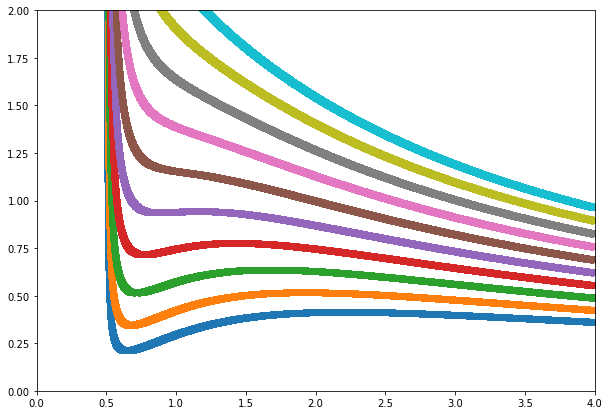

In [128]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(10, 7))
v = np.arange(0.501, 25, 0.00001)

def p(v, T):
    return (T * np.exp(2 - 2 / (v * T))) / (2 * v - 1)

T = 0.7
for y in range(10):
    plt.plot(v, p(v, T), 'x')
    T += 0.07


plt.axis([0, 4, 0, 2])
plt.show()

Минимумы и максимумы изотерм найдем с помощью решения производной, которая в этих точках равна нулю. Они позволят нам определить диапазон поиска границ последующего интегрирования

На графике приведены несколько изотерм сплошной линией. Пунктирной линией обозначены соответствующие по цвету графики производных к каждой изотерме

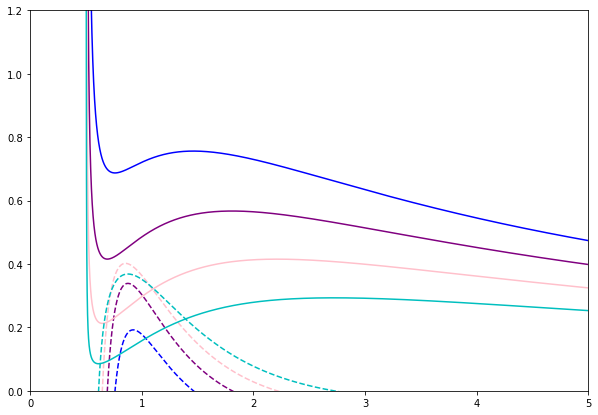

In [41]:
def pro(v, T):
    return 2 * np.exp(2 - 2 / (v * T)) * ((1 / ((v ** 2) * T)) - 1 / (2*v - 1)) / (2*v - 1)
T = 0.8
plt.figure(figsize=(10, 7))
plt.plot(v, pro(v, T), color='purple', linestyle='--')
plt.plot(v, p(v, T), color='purple', linestyle='-')
plt.plot(v, pro(v, 0.9), color='blue', linestyle='--')
plt.plot(v, p(v, 0.9), color='blue', linestyle='-')
plt.plot(v, pro(v, 0.7), color='pink', linestyle='--')
plt.plot(v, p(v, 0.7), color='pink', linestyle='-')
plt.plot(v, pro(v, 0.6), color='c', linestyle='--')
plt.plot(v, p(v, 0.6), color='c', linestyle='-')
plt.axis([0, 5, 0, 1.2])
plt.show()

Ниже приведена функция поиска нулей производных по методу дихотомии
Программа выводит 4 строчки списка чисел, которые соответствуют координатам P, V минимумов и максимумов изотерм. Координаты расположены в порядке возрастания температуры

In [87]:
def dihh(a, b, f, T):
    e = 0.0001
    while abs(b - a) > e:
        if f(a, T) * f(b, T) < 0:
            c = (a + b) / 2
        if f(a, T) * f(c, T) < 0:
            b = c
        else:
            a = c
            if abs(f(c, T)) < 0.0001:
                break
    return c
Vmin = []
Vmax = []
Pmin = []
Pmax = []
T = 0.77
for y in range(5):
    Vmin.append(dihh(0.55, 1, pro, T))
    Vmax.append(dihh(1, 3, pro, T))
    Pmin.append(p(Vmin[y], T))
    Pmax.append(p(Vmax[y], T))
    T += 0.05
print('Vmin:', Vmin)
print('Vmax:', Vmax)
print('Pmin:', Pmin)
print('Pmax:', Pmax)

Vmin: [0.6758483886718751, 0.702105712890625, 0.7349548339843751, 0.7795043945312501, 0.85234375]
Vmax: [1.92138671875, 1.73681640625, 1.5634765625, 1.394287109375, 1.20947265625]
Pmin: [0.34661094223935107, 0.4646344430909247, 0.5993393373253179, 0.7477911614825816, 0.9052892527761883]
Pmax: [0.5178951909087027, 0.6014292747372633, 0.6946841708270479, 0.7993488896645662, 0.918393817861076]


Повторим алгоритм предыдущего уравнения: вычитаем из уравнения i-й изотермы изобару p0, находим их пересечения - границы интегрирования и интегрируем по этим границам, то есть численно находим две площади, увеличиваем значение изобары и т.д. пока площади не станут приблизительно равны друг другу. На этот раз используем для интегрирования метод Симпсона

Программа в первой строке выводит значение изобары для каждой кривой изотермы. Во второй строке выведены точки пересечения для каждой из температур с p0. В третьей строке приведены два списка полученных интегралов для оценки точности программы.

In [88]:
def Pi(v, p0, T):
    return (((T * np.exp(2 - 2 / (v * T)))*(1 / (2 * v - 1))) - p0)
def dih(a, b, f, p, T): # дихотомия для поиска пределов интегрирования в зависимости от p0
    e = 0.001
    while abs(b - a) > e:
        if f(a, p, T) * f(b, p, T) < 0:
            c = (a + b) / 2
        if f(a, p, T) * f(c, p, T) < 0:
            b = c
        else:
            a = c
            if abs(f(c, p, T)) < 0.001:
                break
    return c



def integ(a, b, f, p0, T):
    n = 999
    h = (b - a) / n
    chet = 0
    nech = 0
    
    for i in range(1, int(n/2)):
        chet = chet + f(a + 2*i*h, p0, T)
    for i in range(1, int(n/2)+1):
        nech = nech + f(a + (2*i - 1)*h, p0, T)
    
    sum = 2*chet + 4*nech + f(a, p0, T) + f(b, p0, T)
    return sum * h/3

def integrals(p0, T, Pmin):
    int1 = [] #интеграл 1
    int2 = [] #интеграл 2
    pr = [] # список точек p0
    vv = [] # список точек пересечения графика с p0
    for z in range(0, 5):
        p0 = Pmin[z] + 0.005
        int_1 = 4
        int_2 = 0
        u = 0
        while abs(int_1 - int_2) > 0.0001:
            u = u + 1
            V1 = dih(0.51, Vmin[z], Pi, p0, T)
            V2 = dih(Vmin[z], Vmax[z], Pi, p0, T)
            V3 = dih(Vmax[z], 30, Pi, p0, T)
            int_1 = - integ(V1, V2, Pi, p0, T)
            int_2 = integ(V2, V3, Pi, p0, T)
            p0 = p0 + 0.00001
        T += 0.05
        int1.append(int_1)
        int2.append(int_2)
        vv.append((V1, V2, V3))
        pr.append(p0)
    return int1, int2, pr, vv, u

p0 = Pmin[0] + 0.005
T = 0.77
tup = integrals(p0, T, Pmin)
pres = tup[2]
vv = tup[3]
print('p0 = ', pres)
print("V1, V2, V3 for each T:", vv)
print("Integrals:", tup[0], tup[1])
print("Steps:", tup[4])

p0 =  [0.4757409422394752, 0.5646544430906608, 0.6662393373250362, 0.7818911614824492, 0.9130392527761758]
V1, V2, V3 for each T: [(0.5559970140457153, 1.249963712692261, 3.045628070831299), (0.5797884035110474, 1.179042673110962, 2.592440128326416), (0.6145688486099243, 1.1233243942260742, 2.174417495727539), (0.6668599796295168, 1.067683792114258, 1.7853808403015137), (0.7640832519531249, 1.008587646484375, 1.3922250270843506)]
Integrals: [0.04882580744184744, 0.0337338247349409, 0.01965780025858443, 0.008230425725358832, 0.0012340008721460757] [0.04892566453544587, 0.033815006868961175, 0.019747275683062556, 0.008325628771961661, 0.0013300804917232018]
Steps: 275


Далее построена визуализация равенства площадей для двух некоторых изотерм. Области равных интегралов закрашены светло-красным.

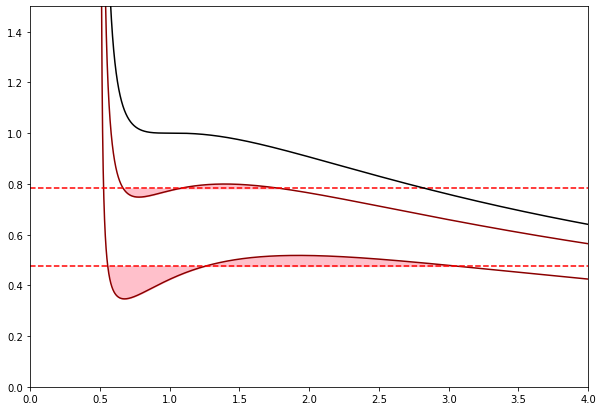

In [129]:
def pp(v):
    return (np.exp(2 - 2 / (v))) / (2 * v - 1)
plt.figure(figsize=(10, 7))
plt.plot(v, p(v, 0.77), color='darkred', linestyle='-')
plt.plot(v, p(v, 0.92), color='darkred', linestyle='-')
plt.axhline(y=pres[0], color='r', linestyle='--')
plt.axhline(y=pres[3], color='r', linestyle='--')
ar = np.arange(vv[0][0], vv[0][2], 0.01)
plt.fill_between(ar, p(ar, 0.77), pres[0], color='pink')
ar = np.arange(vv[3][0], vv[3][2], 0.01)
plt.fill_between(ar, p(ar, 0.92), pres[3], color='pink')
plt.plot(v, pp(v), color='black', linestyle='-')

plt.axis([0, 4, 0, 1.5])
plt.show()

Постром по набору точек примерную область, которая ограничивает однофазные состояния от двухфазных

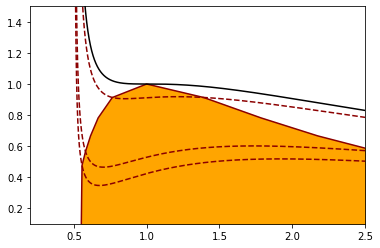

In [140]:
l = 1
x = []
y = []
y.append(0)
x.append(0.55)
for h in range(0,5):
    y.append(pres[h])
    x.append(vv[h][0])

y.append(l)
x.append(l)

for h in range(4, -1, -1):
    y.append(pres[h])
    x.append(vv[h][2])

#print(x)
#print(y)
l = 1
x1 = []
x2 = []
for h in range(0,5):
    x2.append(Pmin[h])
    x1.append(Vmin[h])

x2.append(l)
x1.append(l)
for h in range(4, -1, -1):
    x2.append(Pmax[h])
    x1.append(Vmax[h])

plt.plot(x1,x2)

plt.plot(v, p(v, 0.77), color='darkred', linestyle='--')
plt.plot(v, p(v, 0.82), color='darkred', linestyle='--')
plt.plot(v, p(v, 0.97), color='darkred', linestyle='--')
plt.plot(x, y, color='darkred')
plt.plot(v, pp(v), color='black', linestyle='-')
plt.fill_between(x, y, color='orange')
plt.fill_between(x1, x2, color='purple')
plt.axis([0.2, 2.5, 0.1, 1.5])
plt.show()

